# 1. Set up

## 1.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt

%matplotlib inline 

## 1.2 Functions

In [3]:
#Function to support importing data/finding correct incoding
def find_encoding(fname):
    """
    This function supports the read_csv function in python by returning the file encoding ahead of import.
    Function format provided by the following response on StackExchange:
    https://stackoverflow.com/questions/3323770/character-detection-in-a-text-file-in-python-using-the-universal-encoding-detect
    

    Parameters
    ----------
    fname: csv/text file name or path
        The file you require the encoding for

    Returns
    -------
    charenc
        The encoding for the csv file passed in fname

    """
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

## 1.3 Importing Data

In [4]:
my_encoding = find_encoding('adult.csv')
adult = pd.read_csv('adult.csv', encoding = my_encoding)

print(adult.head(5))

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

# 2. Data Statistics

## 2.1 Size and Shape of Dataset

In [5]:
data_shape = adult.shape
print("Dataset has " + str(data_shape[0]) + " observations, and " + str(data_shape[1]) + " dimensions.")

Dataset has 32561 observations, and 15 dimensions.


## 2.2 Missing Values

Having viewed the data using the header function, I can see that a number of values of the dataset are represented as '?'.  In order to represent these are missing values in pandas, i'm going to change them to nan.

In [6]:
adult = adult.replace("?", np.nan)
adult.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
print(adult.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


# 3. Data Visualisation

## 3.1 Bar chart of Target Values

The intention of the dataset is to predict, based on demographic data, whether a person has an income over or under $50K.  The following historgram shows the dispersion of the target values.

In [8]:
num_adult_by_income = adult.groupby(['income']).count()[['age']]
num_adult_by_income

,age
income,
<=50K,24720
>50K,7841


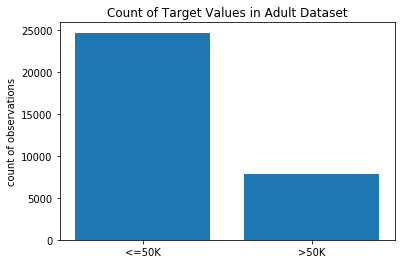

In [9]:
x_values = num_adult_by_income.index.values
y_values = num_adult_by_income.age.values

# Creating our bar plot
ax = plt.bar(x_values, y_values)
plt.ylabel('count of observations')
plt.title("Count of Target Values in Adult Dataset")

plt.show()